In [64]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Step 2
#### Reading in and inspecting the data

In [65]:
df = pd.read_csv("TG_STAID004529.txt", skiprows=19)
df.head()

,SOUID,DATE,TG,Q_TG
0,127440,19610101,12,0
1,127440,19610102,0,0
2,127440,19610103,27,0
3,127440,19610104,16,0
4,127440,19610105,12,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22523 entries, 0 to 22522
Data columns (total 4 columns):
 SOUID      22523 non-null int64
    DATE    22523 non-null int64
   TG       22523 non-null int64
 Q_TG       22523 non-null int64
dtypes: int64(4)
memory usage: 704.0 KB


In [67]:
df.keys()

Index([' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [68]:
# Removing all whitespace from column names

df.columns = df.columns.str.strip()

In [69]:
df.keys()

Index(['SOUID', 'DATE', 'TG', 'Q_TG'], dtype='object')

## Step 3
#### Creating a new temperature column and plotting the raw data as a lineplot.

In [70]:
df["temperature"] = df["TG"] / 10
df

,SOUID,DATE,TG,Q_TG,temperature
0,127440,19610101,12,0,1.2
1,127440,19610102,0,0,0.0
2,127440,19610103,27,0,2.7
3,127440,19610104,16,0,1.6
4,127440,19610105,12,0,1.2
...,...,...,...,...,...
22518,127440,20220827,203,0,20.3
22519,127440,20220828,171,0,17.1
22520,127440,20220829,161,0,16.1
22521,127440,20220830,162,0,16.2


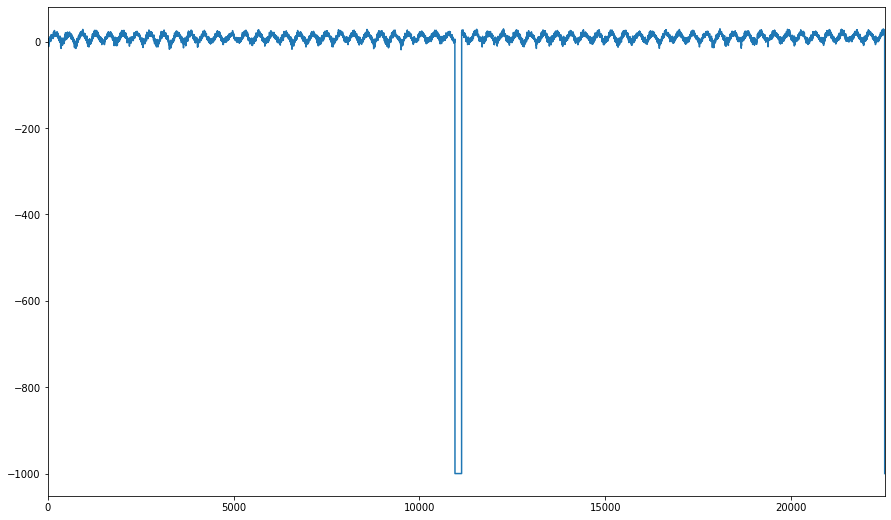

In [71]:
plt.figure(figsize=(15, 9))
df["temperature"].plot()

## Step 4
#### Converting the DATE column to a string and creating a new column in pandas timestamps format from that.

In [72]:
df = df.astype({'DATE':'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22523 entries, 0 to 22522
Data columns (total 5 columns):
SOUID          22523 non-null int64
DATE           22523 non-null object
TG             22523 non-null int64
Q_TG           22523 non-null int64
temperature    22523 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 879.9+ KB


In [73]:
df['year'] = df["DATE"].str[0:4]
df['month'] = df["DATE"].str[4:6]
df['day'] = df["DATE"].str[6:8]

In [74]:
df.head()

,SOUID,DATE,TG,Q_TG,temperature,year,month,day
0,127440,19610101,12,0,1.2,1961,01,01
1,127440,19610102,0,0,0.0,1961,01,02
2,127440,19610103,27,0,2.7,1961,01,03
3,127440,19610104,16,0,1.6,1961,01,04
4,127440,19610105,12,0,1.2,1961,01,05


In [75]:
df["Date"] = df['year'] + '-' + df['month'] + '-' + df['day']

In [76]:
df.head()

,SOUID,DATE,TG,Q_TG,temperature,year,month,day,Date
0,127440,19610101,12,0,1.2,1961,01,01,1961-01-01
1,127440,19610102,0,0,0.0,1961,01,02,1961-01-02
2,127440,19610103,27,0,2.7,1961,01,03,1961-01-03
3,127440,19610104,16,0,1.6,1961,01,04,1961-01-04
4,127440,19610105,12,0,1.2,1961,01,05,1961-01-05


In [77]:
df["Date"] = pd.to_datetime(df["Date"])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22523 entries, 0 to 22522
Data columns (total 9 columns):
SOUID          22523 non-null int64
DATE           22523 non-null object
TG             22523 non-null int64
Q_TG           22523 non-null int64
temperature    22523 non-null float64
year           22523 non-null object
month          22523 non-null object
day            22523 non-null object
Date           22523 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 1.5+ MB


In [79]:
df.head()

,SOUID,DATE,TG,Q_TG,temperature,year,month,day,Date
0,127440,19610101,12,0,1.2,1961,01,01,1961-01-01
1,127440,19610102,0,0,0.0,1961,01,02,1961-01-02
2,127440,19610103,27,0,2.7,1961,01,03,1961-01-03
3,127440,19610104,16,0,1.6,1961,01,04,1961-01-04
4,127440,19610105,12,0,1.2,1961,01,05,1961-01-05


In [80]:
df = df.set_index(df["Date"])

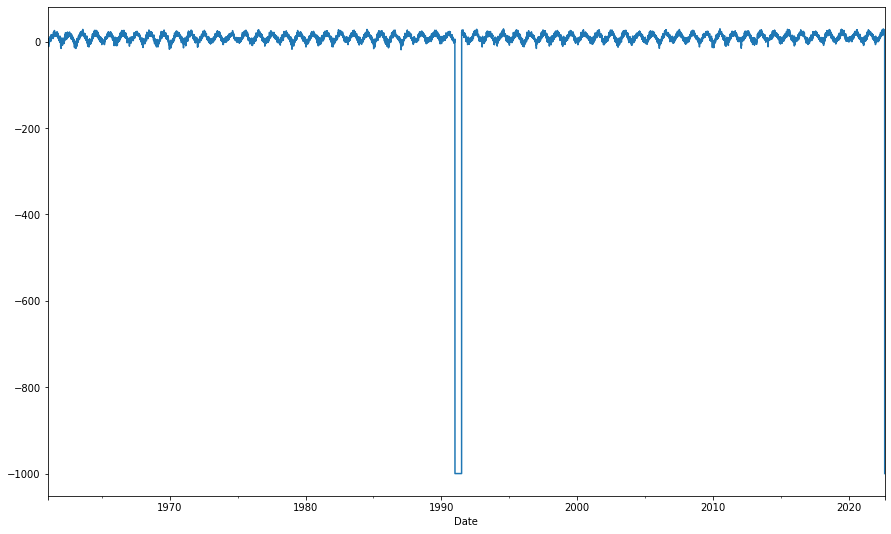

In [81]:
plt.figure(figsize=(15, 9))
df["temperature"].plot()

## Steps 5 and 6
#### Replacing missing temperature values with the median temperature and cutting of the last year.

In [82]:
# Step 5 and 6
df = df.loc[:'2021-12-31']
df["temp"] = df["temperature"].replace(-999.9, df["temperature"].median())

In [83]:
df

,SOUID,DATE,TG,Q_TG,temperature,year,month,day,Date,temp
Date,,,,,,,,,,
1961-01-01,127440,19610101,12,0,1.2,1961,01,01,1961-01-01,1.2
1961-01-02,127440,19610102,0,0,0.0,1961,01,02,1961-01-02,0.0
1961-01-03,127440,19610103,27,0,2.7,1961,01,03,1961-01-03,2.7
1961-01-04,127440,19610104,16,0,1.6,1961,01,04,1961-01-04,1.6
1961-01-05,127440,19610105,12,0,1.2,1961,01,05,1961-01-05,1.2
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,127440,20211227,-42,0,-4.2,2021,12,27,2021-12-27,-4.2
2021-12-28,127440,20211228,-15,0,-1.5,2021,12,28,2021-12-28,-1.5
2021-12-29,127440,20211229,37,0,3.7,2021,12,29,2021-12-29,3.7


## Step 7
#### Plotting the yearly median temperature in Berlin-Buch

Text(0, 0.5, 'Median Temperature')

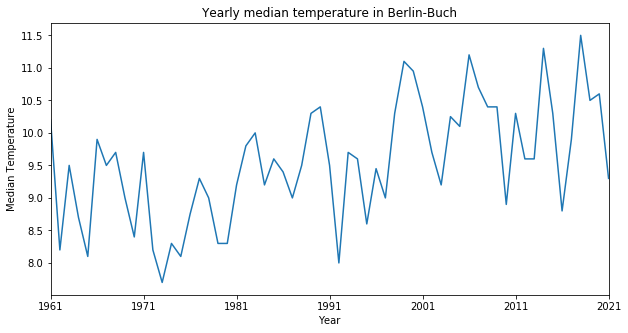

In [84]:
plt.figure(figsize=(10, 5))
yearly_median = df.groupby("year")["temp"].median()
yearly_median.plot()
plt.title('Yearly median temperature in Berlin-Buch')
plt.xlabel("Year")
plt.ylabel("Median Temperature")

## Task 7.1
#### Plotting a heatmap and saving it to PNG.

In [106]:
df_yearly = pd.DataFrame(yearly_median)
df_yearly = df_yearly.transpose()

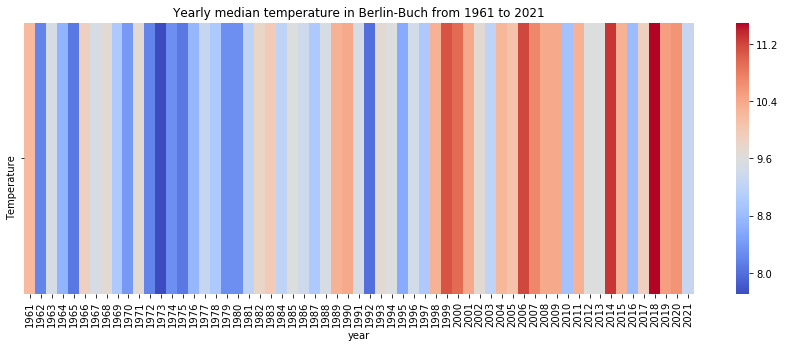

In [107]:
cmap = plt.get_cmap('coolwarm')

plt.figure(figsize=(15, 5))
plt.title('Yearly median temperature in Berlin-Buch from 1961 to 2021')
sns.heatmap(df_yearly, cmap=cmap, yticklabels=["Temperature"])
plt.savefig("Berlin-Buch-heatmap.png", dpi=150)